In [2]:
import pandas as pd

data = pd.read_csv('files/weather.csv', parse_dates=True, index_col=0)
dataset = data[['Humidity3pm', 'Pressure3pm', 'RainTomorrow']]

<Axes: xlabel='Humidity3pm', ylabel='Pressure3pm'>

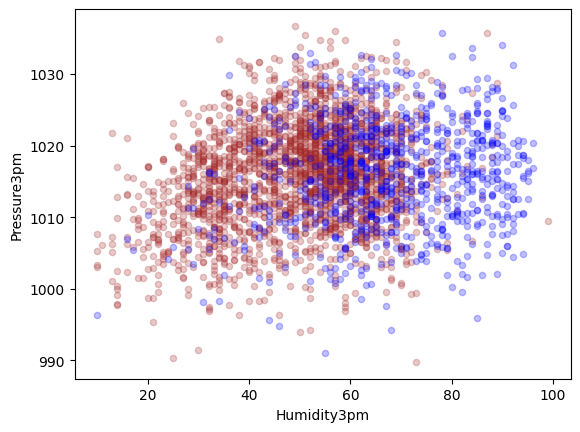

In [118]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
dataset[dataset['RainTomorrow'] == 'No'].plot.scatter(x='Humidity3pm', y='Pressure3pm', alpha=.25, c='brown', ax=ax)
dataset[dataset['RainTomorrow'] == 'Yes'].plot.scatter(x='Humidity3pm', y='Pressure3pm', alpha=.25, c='blue', ax=ax)

In [137]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

dataset_clean = dataset.dropna()
X = dataset_clean[['Humidity3pm', 'Pressure3pm']]
Y = dataset_clean['RainTomorrow']
Y = np.array([0 if value == 'No' else 1 for value in Y])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_train, Y_train)
Y_pred = neigh.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.8140096618357487

c:\Users\familia\Desktop\dev\Tutoriais-Python\.venv\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


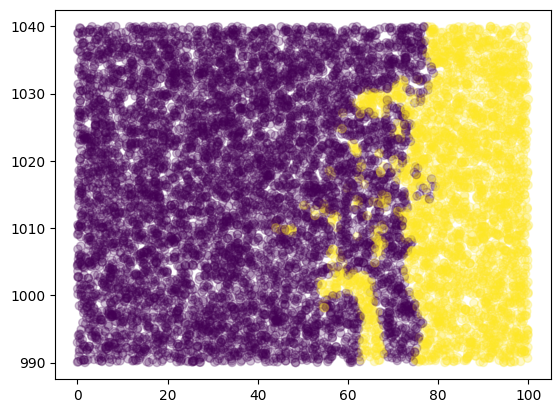

In [129]:
# Verificamos como se comporta a predição para diversos valores que compreendem os dados que originalmente dispomos
X_map = np.random.rand(10000,2)
X_map = X_map*(100,50) + (0,990)
Y_map = neigh.predict(X_map)

fig, ax = plt.subplots()
ax.scatter(x=X_map[:,0], y=X_map[:,1], c=Y_map, alpha=0.25)

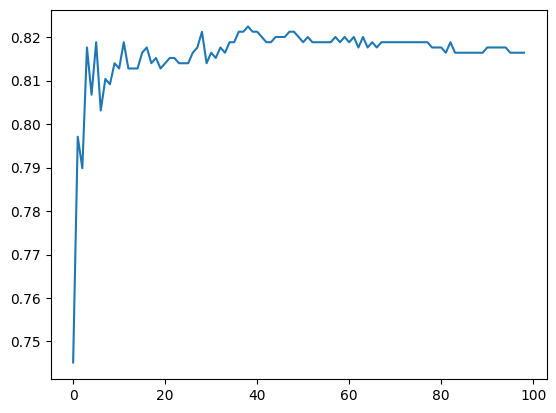

In [139]:
# verificar como diferentes valores de k influenciam na acurácia. 
scores = []

for k in range(1,100):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, Y_train)
    Y_pred = neigh.predict(X_test)
    score = accuracy_score(Y_test, Y_pred)
    scores.append(score)

fig, ax = plt.subplots()
ax.plot(scores)
# Verificamos que a partir de um valores baixos de k já temos valores próximos a 82%